### Clustering laptop on basis of numerical features and specification to see higest demand of laptop sold

In [2]:
import numpy as np 
import pandas as pd 

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
dataset = pd.read_csv('laptop_price_processed.csv')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   Ram               1303 non-null   int64  
 5   OpSys             1303 non-null   object 
 6   Weight            1303 non-null   float64
 7   Price_euros       1303 non-null   float64
 8   IPS_Panel         1303 non-null   int64  
 9   Retina_Display    1303 non-null   int64  
 10  Touchscreen       1303 non-null   int64  
 11  Resolution_X      1303 non-null   int64  
 12  Resolution_Y      1303 non-null   int64  
 13  Total_Pixels      1303 non-null   int64  
 14  High_Resolution   1303 non-null   int64  
 15  Product_Series    1303 non-null   object 
 16  Cpu_Brand         1303 non-null   object 


In [25]:
X = dataset[['Ram', 'Inches', 'Weight', 'Price_euros', 'Total_Pixels', 'Memory_Size(GB)']]

#### sacling dataset

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#### elbow method to find number of cluster

In [27]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=21)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

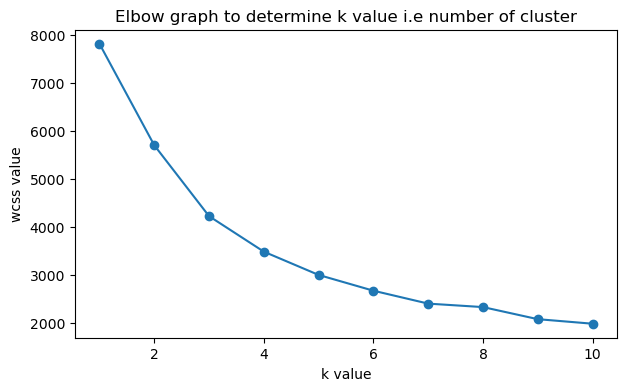

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow graph to determine k value i.e number of cluster')
plt.xlabel('k value')
plt.ylabel('wcss value')
plt.show()

#### KMeans

In [29]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=21)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=21)

In [30]:
dataset['Cluster'] = kmeans.fit_predict(X)

#### analyzing the clusters on basis of features

In [31]:
print(dataset[['Ram', 'Inches', 'Weight', 'Price_euros', 'Total_Pixels', 'Memory_Size(GB)', 'Cluster']].groupby('Cluster').mean())

               Ram     Inches    Weight  Price_euros  Total_Pixels  \
Cluster                                                              
0         6.015152  15.461616  2.085028   764.682449  1.650669e+06   
1         7.201183  15.887278  2.323050   790.849467  1.754935e+06   
2        17.344000  16.652800  3.162560  2122.928640  2.107238e+06   
3        15.935484  14.741935  1.980645  2333.650806  7.380232e+06   
4         7.722513  13.296073  1.380859  1266.990445  2.246448e+06   

         Memory_Size(GB)  
Cluster                   
0             309.101010  
1            1144.544379  
2            1119.040000  
3             804.903226  
4             285.183246  


#### dimensionality reduction for visualzing cluster on 2-D with many features

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[-1.09413691,  1.96447638],
       [-1.75251265,  0.58337376],
       [-0.61808776, -0.35795313],
       ...,
       [-2.41659213, -0.64729142],
       [ 0.07844896, -1.2939917 ],
       [-0.77212147, -1.45907489]])

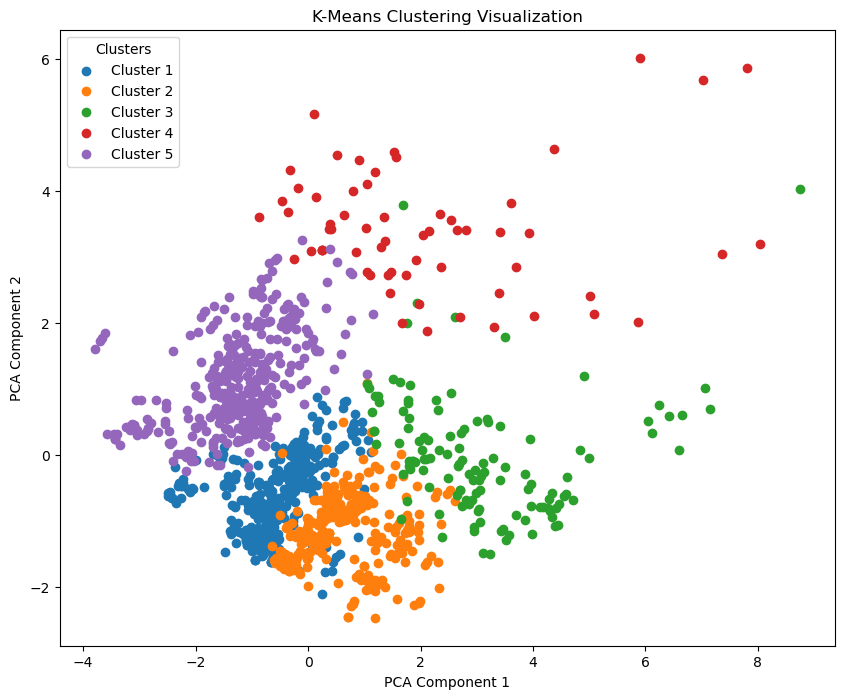

In [37]:
plt.figure(figsize=(10,8))
for cluster in range(5):
    cluster_data = X_pca[dataset['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization')

# Add legend
plt.legend(title="Clusters")
plt.show()